In [1]:
%matplotlib notebook
%pylab

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


In [116]:
%%bash

# Usage :  
#    $ deriv <N> <deriv_choice>
# where <N> is the number of mesh cells and <deriv_choice> is 1 for the first
# derivative and 2 is the second derivative.

mpirun -n 4 derivp 16 2

In [117]:
# Open file for reading; use binary mode
fout = open("deriv.out","rb")

# Read meta data
dt_meta = dtype([('N','int32'),('a','d'),('b','d'),('deriv_choice','int32')])
d = fromfile(fout,dtype=dt_meta, count=1)[0]

# create dictionary containing meta data
parms = dict(zip(dt_meta.fields,d))

# Print meta data from dictionary
print("N = {N:d}\na = {a:g}\nb = {b:g}\nDerivative choice = {deriv_choice:d}".format(**parms))

# Assign values in tuple directly (for use below)
N,a,b,deriv_choice = d

# Read solution data
dt_deriv = dtype([('q','d',N+1)])  
data = fromfile(fout,dtype=dt_deriv,count=2)

# Close file
fout.close()

N = 16
a = 0
b = 1
Derivative choice = 2


<IPython.core.display.Javascript object>


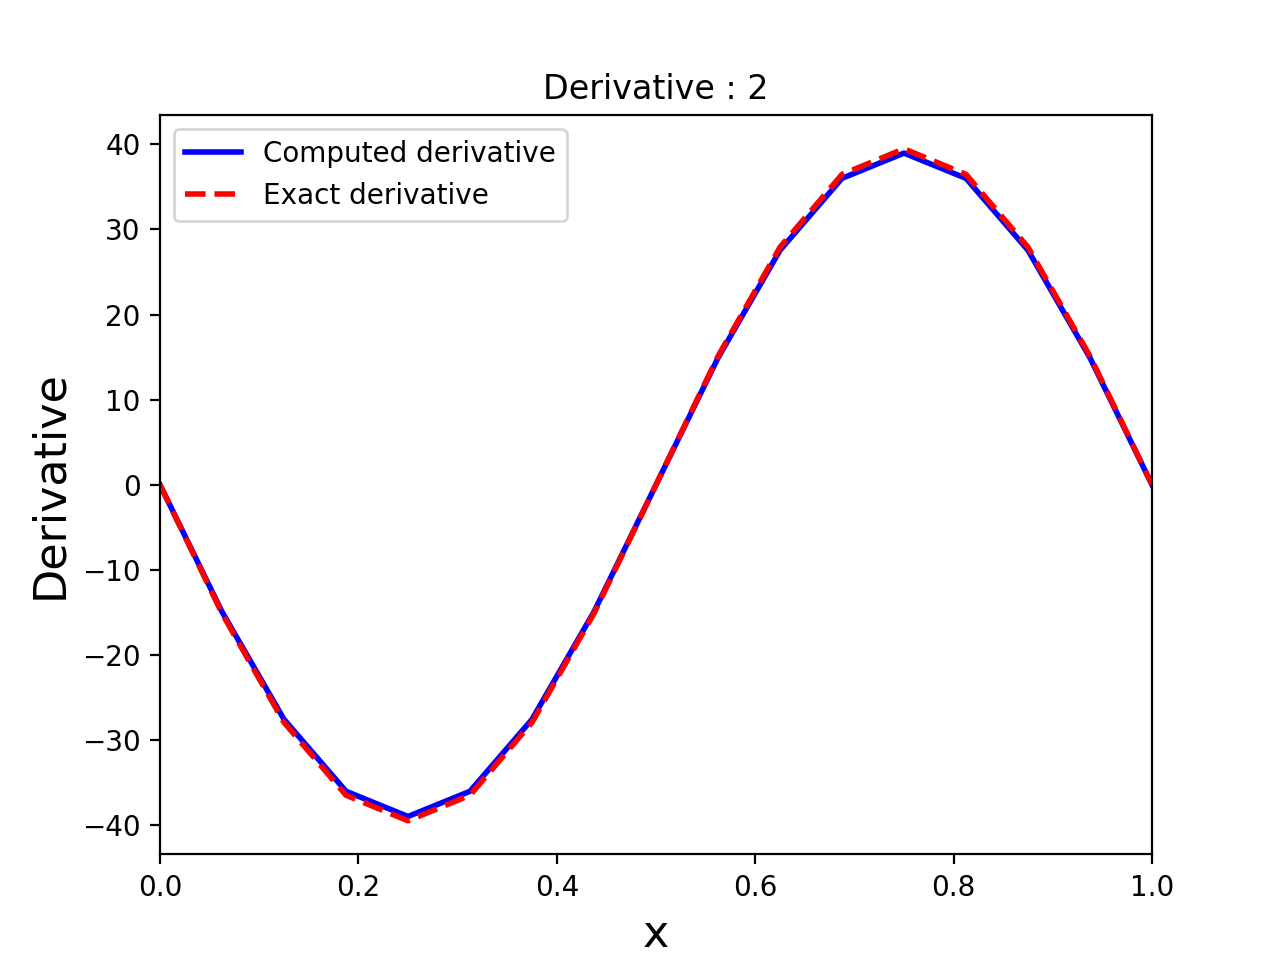

   16   5.0473825013624207e-01


In [118]:
fig = figure(1)
clf()

soln = data[0][0]
q = data[1][0]

err = norm(q-soln,ord=inf)
print("{:5d} {:24.16e}".format(N,err))

x = linspace(a,b,N+1)

plot(x,q,linewidth=2,color='b',label='Computed derivative')
plot(x,soln,linewidth=2,color='r',linestyle='--',label='Exact derivative')

tstr = 'Derivative : {:d}'.format
htitle = title(tstr(deriv_choice))

xlabel('x',fontsize=16)
ylabel('Derivative',fontsize=16)
xlim([a,b])

legend()

fig.canvas.draw()  

In [111]:
Nv = array([64,   128,        256,        512,        1024,       2048])
e  = array([1.008832e-02, 2.5230e-03, 6.3081e-04, 1.5770e-04, 3.9426e-05, 9.8566e-06])

log2(e[:-1]/e[1:])

array([1.99947383, 1.99986277, 2.00002287, 1.99996341, 1.99998536])